In [1]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import shutil

In [2]:
import numpy as np
import tensorflow
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import tensorflow_datasets as tfds
import glob

from matplotlib import pyplot as plt
%matplotlib inline
print(os.listdir("data/train"))

['bikedir', 'mountain_bike', 'road_bike']


In [3]:
base_dir = 'data/train'
imgm_dir = 'data/train/mountain_bike'
imgr_dir = 'data/train/road_bike'

In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
trans = transforms.Compose([transforms.Resize((128,128)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root="data/train", transform=trans)

In [6]:
trainset.__getitem__(18)

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 0)

In [7]:
trainloader=DataLoader(trainset,
                      batch_size=50,
                      shuffle=True,
                      num_workers =3)

In [8]:
len(trainset)

411

In [9]:
classes = trainset.classes
classes

['bikedir', 'mountain_bike', 'road_bike']

In [10]:
bike_dir = os.path.join(base_dir,'bikedir')

#os.mkdir(bike_dir)

In [11]:
fnames=['mountain_bike_{}.jpg'.format(i) for i in range(100)]

for fname in fnames:
    src = os.path.join(imgm_dir,fname)
    dst = os.path.join(bike_dir,fname)
    shutil.copyfile(src,dst)

In [12]:
fnames=['road_bike_{}.jpg'.format(i) for i in range(100)]

for fname in fnames:
    src = os.path.join(imgr_dir,fname)
    dst = os.path.join(bike_dir,fname)
    shutil.copyfile(src,dst)

In [13]:
os.listdir(bike_dir)

['mountain_bike_0.jpg',
 'mountain_bike_1.jpg',
 'mountain_bike_10.jpg',
 'mountain_bike_11.jpg',
 'mountain_bike_12.jpg',
 'mountain_bike_13.jpg',
 'mountain_bike_14.jpg',
 'mountain_bike_15.jpg',
 'mountain_bike_16.jpg',
 'mountain_bike_17.jpg',
 'mountain_bike_18.jpg',
 'mountain_bike_19.jpg',
 'mountain_bike_2.jpg',
 'mountain_bike_20.jpg',
 'mountain_bike_21.jpg',
 'mountain_bike_22.jpg',
 'mountain_bike_23.jpg',
 'mountain_bike_24.jpg',
 'mountain_bike_25.jpg',
 'mountain_bike_26.jpg',
 'mountain_bike_27.jpg',
 'mountain_bike_28.jpg',
 'mountain_bike_29.jpg',
 'mountain_bike_3.jpg',
 'mountain_bike_30.jpg',
 'mountain_bike_31.jpg',
 'mountain_bike_32.jpg',
 'mountain_bike_33.jpg',
 'mountain_bike_34.jpg',
 'mountain_bike_35.jpg',
 'mountain_bike_36.jpg',
 'mountain_bike_37.jpg',
 'mountain_bike_38.jpg',
 'mountain_bike_39.jpg',
 'mountain_bike_4.jpg',
 'mountain_bike_40.jpg',
 'mountain_bike_41.jpg',
 'mountain_bike_42.jpg',
 'mountain_bike_43.jpg',
 'mountain_bike_44.jpg',
 'mou

In [14]:
bikes = os.listdir("data/train/bikedir")
categories = []
for bike in bikes:
    category = bike.split('_')[0]
    if category == 'mountain':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': bikes,
    'category': categories
})

In [15]:
df.head(240)

,filename,category
0,mountain_bike_0.jpg,1
1,mountain_bike_1.jpg,1
2,mountain_bike_10.jpg,1
3,mountain_bike_11.jpg,1
4,mountain_bike_12.jpg,1
...,...,...
195,road_bike_95.jpg,0
196,road_bike_96.jpg,0
197,road_bike_97.jpg,0
198,road_bike_98.jpg,0


<AxesSubplot:>

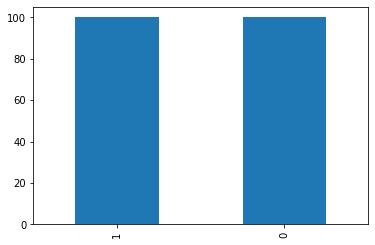

In [16]:
df['category'].value_counts().plot.bar()

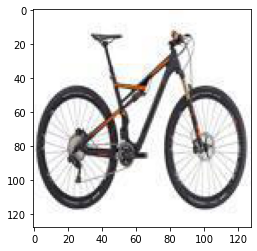

In [17]:
sample = random.choice(bikes)
image = keras.utils.load_img("data/train/bikedir/"+sample)
plt.imshow(image)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 58, 58, 128)      5

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [20]:
earlystop = EarlyStopping(patience=10)

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0000001)

In [22]:
callbacks = [earlystop, learning_rate_reduction]

In [23]:
df["category"] = df["category"].replace({0: 'Road', 1: 'Mountain'}) 

In [24]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=50)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

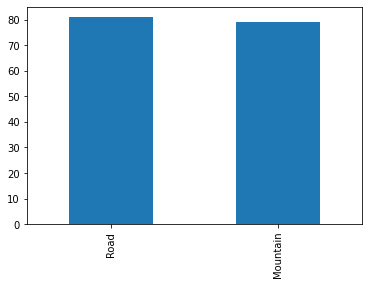

In [25]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

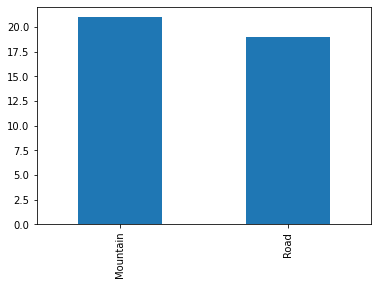

In [26]:
validate_df['category'].value_counts().plot.bar()

In [27]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=50

In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "data/train/bikedir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 160 validated image filenames belonging to 2 classes.


In [29]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "data/train/bikedir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 40 validated image filenames belonging to 2 classes.


In [30]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "data/train/bikedir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


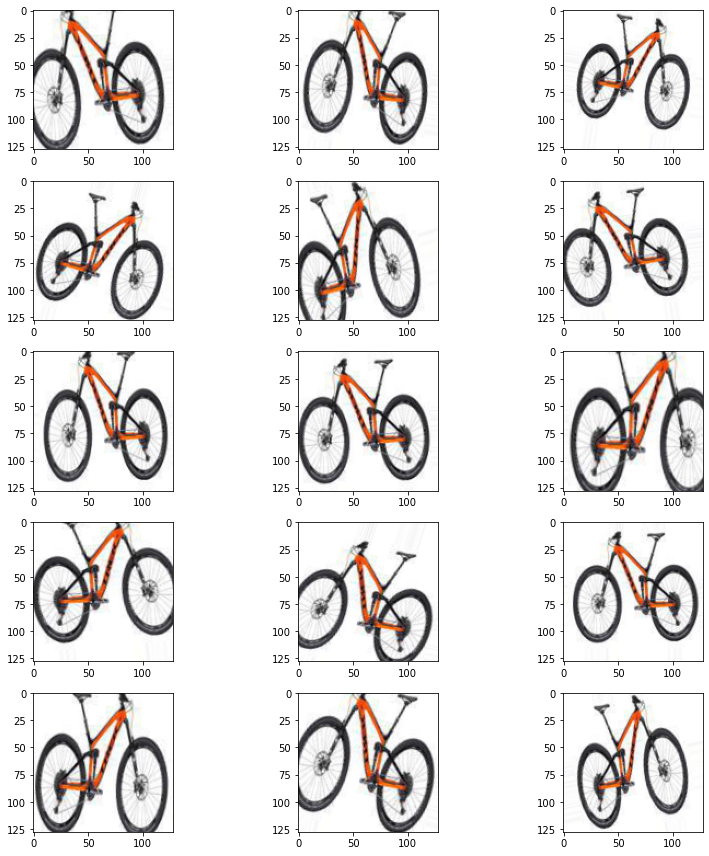

In [31]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [32]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
3/3 [==============================] - 9s 2s/step - loss: 1.0020 - accuracy: 0.6455 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - 7s 2s/step - loss: 0.7044 - accuracy: 0.8364 - lr: 0.0010
Epoch 3/50
3/3 [==============================] - 8s 2s/step - loss: 0.2043 - accuracy: 0.9182 - lr: 0.0010
Epoch 4/50
3/3 [==============================] - 9s 2s/step - loss: 0.4434 - accuracy: 0.8727 - lr: 0.0010
Epoch 5/50
3/3 [==============================] - 8s 4s/step - loss: 0.2304 - accuracy: 0.9091 - lr: 0.0010
Epoch 6/50
3/3 [==============================] - 9s 2s/step - loss: 0.2471 - accuracy: 0.8909 - lr: 0.0010
Epoch 7/50
3/3 [==============================] - 9s 2s/step - loss: 0.2217 - accuracy: 0.9182 - lr: 0.0010
Epoch 8/50
3/3 [==============================] - 10s 3s/step - loss: 0.1271 - accuracy: 0.9364 - lr: 0.0010
Epoch 9/50
3/3 [==============================] - 15s 5s/step - loss: 0.1786 - accuracy: 0.9267 - lr: 0.0010
Epoch 10/50
3/3 [=========

3/3 [==============================] - 14s 5s/step - loss: 0.0415 - accuracy: 0.9933 - lr: 0.0010
Epoch 19/50
3/3 [==============================] - 11s 3s/step - loss: 0.1381 - accuracy: 0.9455 - lr: 0.0010
Epoch 20/50
3/3 [==============================] - 11s 3s/step - loss: 0.1674 - accuracy: 0.9455 - lr: 0.0010
Epoch 21/50
3/3 [==============================] - 7s 2s/step - loss: 0.2292 - accuracy: 0.9273 - lr: 0.0010
Epoch 22/50
3/3 [==============================] - 9s 4s/step - loss: 0.4832 - accuracy: 0.8727 - lr: 0.0010
Epoch 23/50
3/3 [==============================] - 9s 2s/step - loss: 0.0941 - accuracy: 0.9545 - lr: 0.0010
Epoch 24/50
3/3 [==============================] - 9s 3s/step - loss: 0.4085 - accuracy: 0.8818 - lr: 0.0010
Epoch 25/50
3/3 [==============================] - 15s 5s/step - loss: 0.0825 - accuracy: 0.9667 - lr: 0.0010
Epoch 26/50
3/3 [==============================] - 12s 5s/step - loss: 0.1235 - accuracy: 0.9545 - lr: 0.0010
Epoch 27/50
3/3 [=========

3/3 [==============================] - 11s 3s/step - loss: 0.0093 - accuracy: 1.0000 - lr: 0.0010
Epoch 37/50
3/3 [==============================] - 11s 5s/step - loss: 0.0218 - accuracy: 0.9909 - lr: 0.0010
Epoch 38/50
3/3 [==============================] - 10s 3s/step - loss: 0.1080 - accuracy: 0.9545 - lr: 0.0010
Epoch 39/50
3/3 [==============================] - 13s 4s/step - loss: 0.0571 - accuracy: 0.9733 - lr: 0.0010
Epoch 40/50
3/3 [==============================] - 12s 4s/step - loss: 0.0864 - accuracy: 0.9800 - lr: 0.0010
Epoch 41/50
3/3 [==============================] - 11s 4s/step - loss: 0.0600 - accuracy: 0.9733 - lr: 0.0010
Epoch 42/50
3/3 [==============================] - 11s 4s/step - loss: 0.0269 - accuracy: 0.9933 - lr: 0.0010
Epoch 43/50
3/3 [==============================] - 11s 3s/step - loss: 0.0137 - accuracy: 1.0000 - lr: 0.0010
Epoch 44/50
3/3 [==============================] - 10s 3s/step - loss: 0.0175 - accuracy: 1.0000 - lr: 0.0010
Epoch 45/50
3/3 [=====

In [33]:
model.save_weights("model.h5")

KeyError: 'val_loss'

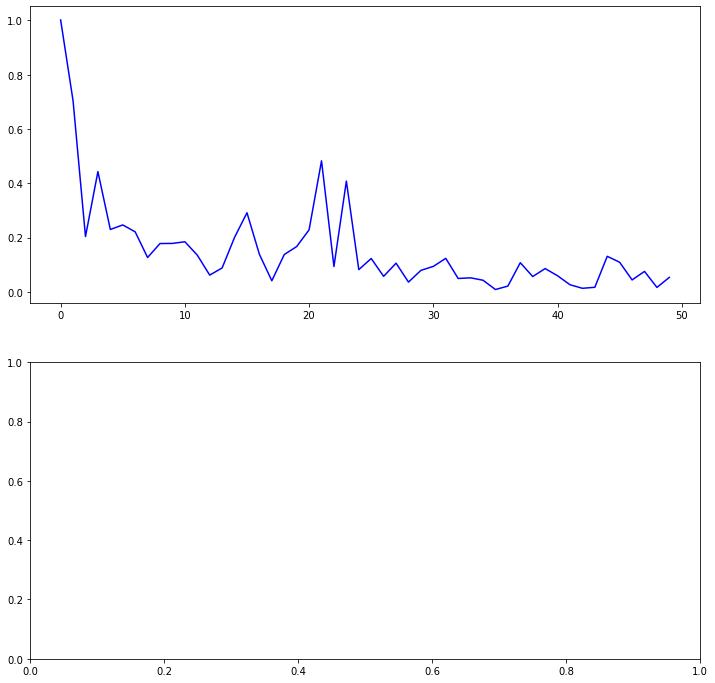

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("data/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "data/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category'] = test_df['category'].replace({ 'Mountain': 1, 'Road': 0 })

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = keras.utils.load_img("data/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)